# Categorization of Asteroids by Probable Origin


Introduction to Data Science (MATH 3900 / CS 5963), University of Utah   
http://datasciencecourse.net/2016/

**Final Project**  
Annie Yun, lyunews@gmail.com  

## Video
Video Link: http://www.screencast.com/t/l1Wp4MtnJDO5

# Background and Motivation



The mechanics of solar system formation and collisions that cause the orbits and placements of various solar system objects are not well understood. Throughout the history of the solar system, ejections from the solar system, collisions with other objects, and interactions with the gravitational forces of large objects have varied the orbits and properties of objects from their original orbits. To better understand the collisions and forces that shape the solar system as we know it today, astronomers and physicists seek to trace collisions, ejections and orbital interactions backwards through time. 

In the investigation of the history of the solar system, groupings of objects are particularly useful. Objects with very similar compositions but different orbits can indicate a history of collision and perturbation. Objects with different compositions and similar orbits can suggest that these objects were aligned by a strong force, such as a passing star or large outer plane. 

These groupings are important to astrophysicists especially in light of recent discoveries. In the last two decades, space objects that are very distant in their orbit have been identified and classified. These objects are known as Trans-Neptunian Objects. Upon determination of their orbital elements and physical properties, it was noted that they had similarly aligned orbits, inclined abnormally above the normal plane of orbit in the solar system. This discovery prompted the hypothesis that there exists a ninth planet in the outer solar system, massive enough to align and maintain the orbits of these Trans-Neptunian objects. There exist other hypotheses for the strong similarities in the orbital elements of eccentricity, longitude of the ascending node and inclination of many of the Trans-Neptunian objects, such as a massive disk of matter in the outer solar system or a passing star. The reasons for the alignments of these Trans-Neptunian objects are the primary focus of my research. To better investigate the origins of these orbital alignments, it is important to find other categories of objects with similar histories. 

# Project Objectives


The primary objective is to find groupings of objects with similar orbital elements and alignment, or with other similarities discoverable by machine learning. Within all known asteroids, I'd like to find groups with similarities in orbital elements and in orbital alignment, because these are often suggestive of similar origins and histories. 
This would provide data for astrophysicists to work within in trying to unravel the history of the solar system. In addition, classifying Trans-Neptunian objects in particular could reveal orbital similarities that may lead to a determination of the existence of a ninth planet. The program may be able to discover similarities between the conforming set of Trans-Neptunian objects and its outliers to determine whether objects that do not satisfy similarities in orbital alignment cant still be explained by the existence of a ninth planet or by the passage of a star. 

# Data
 

Data will be obtained from NASA's Jet Propulsion Laboratory Small Body Database, which catalogues orbital elements, physical properties and vector properties for all known asteroids. Data was collected through the download of several csv files. 

In [53]:
import pandas as pd
import numpy as np
import math 
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn import metrics
import scipy.sparse as sp


from scipy import stats

from sklearn.metrics import homogeneity_score



pd.set_option('display.notebook_repr_html', False)
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["Red","Green","Blue","Yellow", "Pink",'Cyan','Black','Magenta'])


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [54]:
# import of data, general description of orbital quanitities within the dataset
sb1=pd.read_csv("sb1.csv")
sb2=pd.read_csv("sb2.csv")
sb5=pd.read_csv("sb5.csv")
sb4=pd.read_csv("sb4.csv")

fin=sb1.append(sb2,ignore_index=True)
fin=fin.append(sb4,ignore_index=True)
fin=fin.append(sb5,ignore_index=True)

fin


                 full_name         e         a         q          i  \
0                  1 Ceres  0.075705  2.768134  2.558572  10.591705   
1                10 Hygiea  0.113305  3.141918  2.785922   3.830835   
2            11 Parthenope  0.100348  2.452855  2.206715   4.629641   
3              12 Victoria  0.220698  2.334175  1.819028   8.367887   
4                13 Egeria  0.083659  2.576526  2.360977  16.539713   
5                 14 Irene  0.166453  2.585651  2.155263   9.119221   
6               15 Eunomia  0.187147  2.643234  2.148560  11.738428   
7               100 Hekate  0.168445  3.089617  2.569188   6.429569   
8               101 Helena  0.139766  2.584796  2.223530  10.197576   
9               102 Miriam  0.252981  2.661006  1.987821   5.178323   
10                103 Hera  0.081203  2.701086  2.481748   5.419571   
11             104 Klymene  0.157748  3.152564  2.655255   2.790483   
12             105 Artemis  0.177820  2.373189  1.951189  21.444332   
13    

# Data Processing


Minimal data processing needs to be done. Originally, I believed that the Laplace-Runz-Lenz vector needed to be extracted to judge orbital alignment. However, it is more useful for visualization than for categorization of the asteroids. 


Physical properties of the asteroids will also be extracted. However, knowledge of the physical properties of many asteroids is quite limited, since only bright and large asteroids are easily observed and analyzed for physical characteristics.
Data processing will be implemented through the usage of a pandas dataframe after importing the data as a csv file. 

First, given the spectral type of asteroids, it is important to create another column of the dataframe containing their primary spectral type. Many asteroids are a certain type, while still exhitibiting qualities of a second type. We can create a new column for their primary type using the map function

In [55]:
fin.fillna("nan")

print(fin['spec_B'].unique(), '\n')
fin['spec_B'] = fin['spec_B'].str.replace(':','')
fin['spec_B'] = fin['spec_B'].str.replace(' type','')
fin['spec_B'] = fin['spec_B'].str.replace('\(IV\)','')
print(fin['spec_B'].unique(), '\n')
fin["primary"] = fin["spec_B"].map({'C':'C', 'Ch':'C', 'Cgh':'C', 'B':'C', 'Cb':'C', 'Cg':'C', 
                                    'Q':'S', 'R':'S', 'Sk':'S', 'Sa':'S', 'Sl':'S','K':'S', 'Sr':'S','A':'S','Sq':'S', 
                                   'X':'X', 'Xk':'X', 'Xc':'X','Xe':'X',
                                   'T':'T',
                                   'D':'D',
                                   'L':'L', 'Ld':'L',
                                   'O':'O',
                                   'V':'V',
                                   'U':'U'})
print(fin['primary'].unique(), '\n')


['C' 'Sk' 'L' 'Ch' 'S' 'Cgh' 'X' 'Sl' 'Xk' nan 'Xc' 'Xe' 'B' 'Cb' 'K' 'Sr'
 'A' 'Sq' 'Cg' 'Ld' 'Sa' 'T' 'S:' 'D' 'Q' 'V' 'X:' 'R' 'U' 'S(IV)' 'O' 'K:'
 'Sq:' 'C type' 'C:'] 

['C' 'Sk' 'L' 'Ch' 'S' 'Cgh' 'X' 'Sl' 'Xk' nan 'Xc' 'Xe' 'B' 'Cb' 'K' 'Sr'
 'A' 'Sq' 'Cg' 'Ld' 'Sa' 'T' 'D' 'Q' 'V' 'R' 'U' 'O'] 

['C' 'S' 'L' nan 'X' 'T' 'D' 'V' 'U' 'O'] 



# Exploratory Analysis


To explore this dataset, I will create scatterplots of the various orbital elements to give a sense of any clustering of asteroids around values of orbital elements. Here, I expect to see a strong asteroid present within, or inclined very close to the ecliptic plane, due to the influence of the sun and the planets. In addition, examining spectral counts and the distribution of values of orbital elements will give a better sense of the dataset. 

In [56]:
print (fin.describe())
print(fin.shape, '\n')
print(fin.dtypes, '\n') 

                   e              a              q              i  \
count  474120.000000  474120.000000  474120.000000  474120.000000   
mean        0.142083       2.725429       2.333712       8.069715   
std         0.073453       2.192689       0.995105       5.847359   
min         0.000151       0.615922       0.080294       0.004690   
25%         0.088003       2.387136       2.002116       3.705414   
50%         0.136227       2.634811       2.238120       6.517539   
75%         0.187067       2.974271       2.588395      11.137452   
max         0.970566     742.925719      76.027072     172.867189   

                  om              w           BV          UB   IR  
count  474120.000000  474120.000000  1020.000000  978.000000  0.0  
mean      167.813907     180.565085     0.769338    0.364605  NaN  
std       102.637411     103.639468     0.088576    0.095606  NaN  
min         0.002233       0.000957     0.580000    0.120000  NaN  
25%        80.129304      90.489826   

C:\Users\Annie\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Here, we see some clustering of orbital elements. The standard deviation of eccentricity is quite low. However, this is due to surveying techniques that are more effective in finding asteroids with smaller eccentricites. The description of inclination matches what would be expected, since most asteroids are inclined very closely to the plane of the ecliptic. The wide variation in longitude of the ascending node and argument of the perihelion are to be expected. 

In [57]:
print(fin.corr())

           e         a         q         i        om         w        BV  \
e   1.000000  0.027818 -0.229931  0.102228  0.005211  0.013669  0.003709   
a   0.027818  1.000000  0.636361  0.065682 -0.000178  0.001423 -0.284796   
q  -0.229931  0.636361  1.000000  0.060835 -0.002618 -0.001649 -0.243413   
i   0.102228  0.065682  0.060835  1.000000 -0.022862 -0.001068 -0.005640   
om  0.005211 -0.000178 -0.002618 -0.022862  1.000000 -0.131486  0.023252   
w   0.013669  0.001423 -0.001649 -0.001068 -0.131486  1.000000 -0.032663   
BV  0.003709 -0.284796 -0.243413 -0.005640  0.023252 -0.032663  1.000000   
UB  0.061908 -0.350299 -0.326124 -0.067947 -0.018341 -0.029821  0.799993   
IR       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          UB  IR  
e   0.061908 NaN  
a  -0.350299 NaN  
q  -0.326124 NaN  
i  -0.067947 NaN  
om -0.018341 NaN  
w  -0.029821 NaN  
BV  0.799993 NaN  
UB  1.000000 NaN  
IR       NaN NaN  


One interesting task is looking at the spectral types of the various asteroids. Spectral type data is quite limited in comparison to the size of the dataset. Since the classification types allow for intermediates, we can examine the asteroids by their full designation and by their primary type.  

S      451
C      153
Ch     138
X      131
Sq     102
Xc      65
B       64
Sl      56
Xk      47
V       45
L       39
Sa      37
Cb      36
K       35
Xe      30
Sr      25
Sk      25
Q       19
A       17
T       17
Cgh     15
Ld      13
D       11
Cg      10
O        6
R        5
U        4
Name: spec_B, dtype: int64 

C    416
S    321
X    273
L     52
V     45
T     17
D     11
O      6
U      4
Name: primary, dtype: int64 



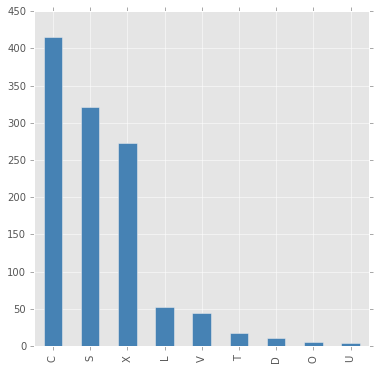

In [58]:
print(fin['spec_B'].value_counts(), '\n')
print(fin['primary'].value_counts(), '\n')
fin["primary"].value_counts().plot(kind='bar',figsize=(6,6), color="#4682B4");

Using a bar graph to look at the primary spectral type of the asteroids, it is evident that spectral types C, S, and X are the most common. This result is consistent with existing literature that indicates that, within the main belt, which is the easiest to survey for spectral data, carbonaceous, silicaceous and metallic objects are most common. 

Below, we graph the carbonaceous, silicaceous and metallic asteroids by their eccentricity and semi-major axis to see if there are noticeable clusters in space. The large grouping of asteroids near a=3 and e=0.1 can be explained by surveying bias, since it is much easier to obtain spectral data on main belt asteroids. It is noticeable that the silicaceous asteroids are the most disparate through space. In additon, there is a prominent outlier- a carbonaceous asteroids with a semimjaor axis around 13.5 AU and eccentricity around 0.4.  

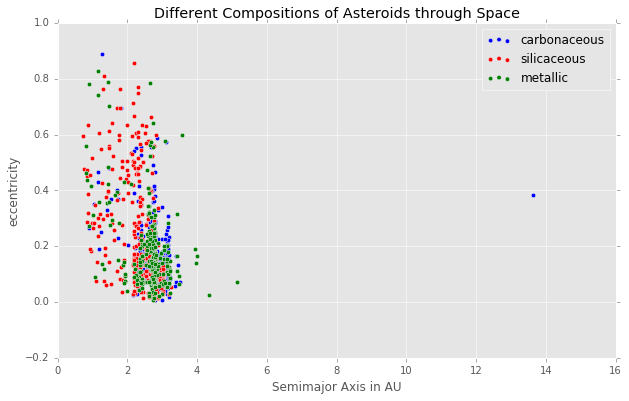

In [59]:
ax = fin[fin['primary'] == 'C'].plot(kind="scatter",y="e",x="a",color='Blue', label='carbonaceous');
fin[fin['primary'] == 'S'].plot(kind="scatter",y="e",x="a",color='Red', label='silicaceous',ax=ax);
fin[fin['primary'] == 'X'].plot(kind="scatter",y="e",x="a",color='Green', label='metallic',ax=ax);

plt.xlabel('Semimajor Axis in AU')
plt.ylabel('eccentricity')
plt.title("Different Compositions of Asteroids through Space")

Since we may be interested in judging similarities of asteroids by their BV and UB spectra, plotting BV and coloring by spectral type may give us an idea of correspondence between BV and spectral type.

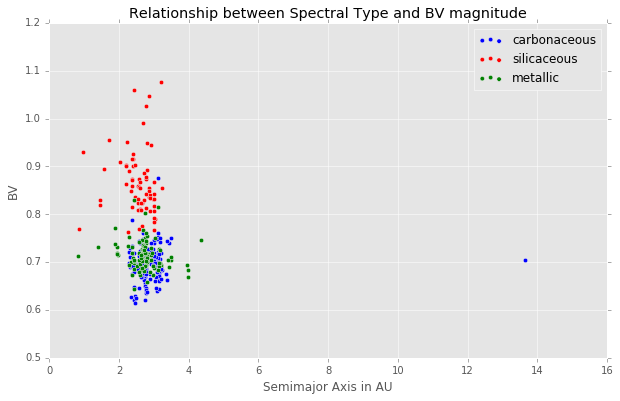

In [60]:
ax = fin[fin['primary'] == 'C'].plot(kind="scatter",y="BV",x="a",color='Blue', label='carbonaceous');
fin[fin['primary'] == 'S'].plot(kind="scatter",y="BV",x="a",color='Red', label='silicaceous',ax=ax);
fin[fin['primary'] == 'X'].plot(kind="scatter",y="BV",x="a",color='Green', label='metallic',ax=ax);

plt.xlabel('Semimajor Axis in AU')
plt.ylabel('BV')
plt.title('Relationship between Spectral Type and BV magnitude')

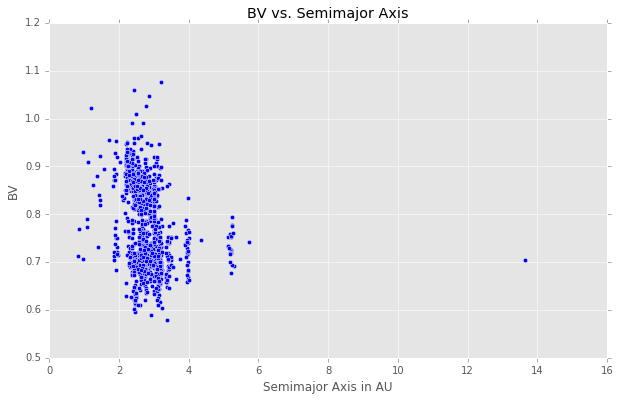

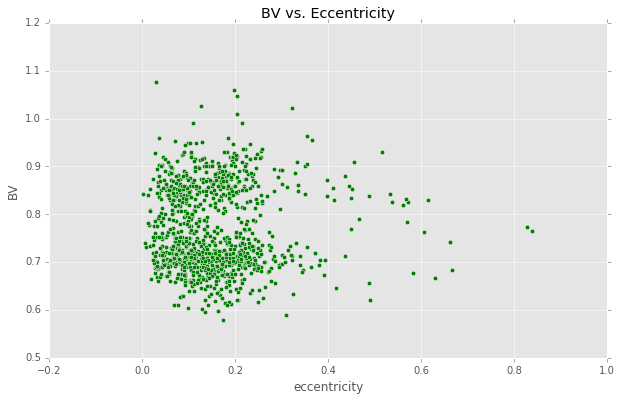

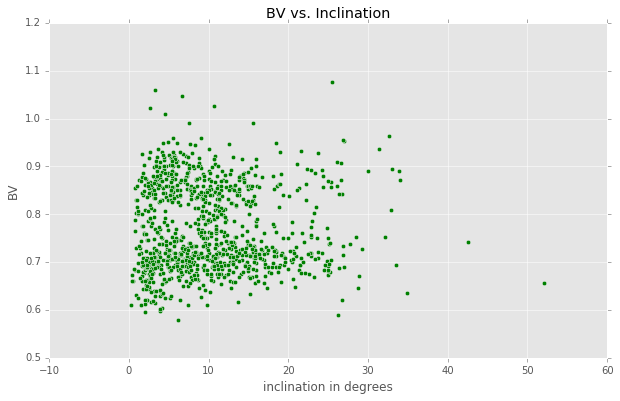

In [13]:
ax = fin.plot(kind="scatter",y="BV",x="a",color='Blue');
plt.xlabel('Semimajor Axis in AU')
plt.ylabel('BV')
plt.title("BV vs. Semimajor Axis")
ax = fin.plot(kind="scatter",y="BV",x="e",color='Green');
plt.xlabel('eccentricity')
plt.ylabel('BV')
plt.title("BV vs. Eccentricity")
ax = fin.plot(kind="scatter",y="BV",x="i",color='Green');
plt.xlabel('inclination in degrees')
plt.ylabel('BV')
plt.title("BV vs. Inclination")

# Analysis Methodology

I intend to use agglomerative and density-based clustering methods to cluster the asteroids. First, I looked at a K-means clustering of all the asteroids in my dataset. 

In [10]:
finmat=fin.as_matrix()
nums=finmat[:,1:7]
seminums=finmat[:,1:3]

#temp=np.delete(finmat, 0,1)
#finnew=pd.DataFrame(temp,names,['PC1','PC2','PC3','PC4'])
#temp=pd.DataFrame(fin['full_name'], fin[:,1:])

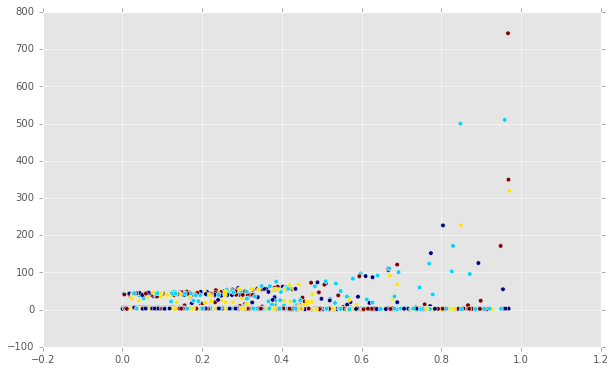

C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A

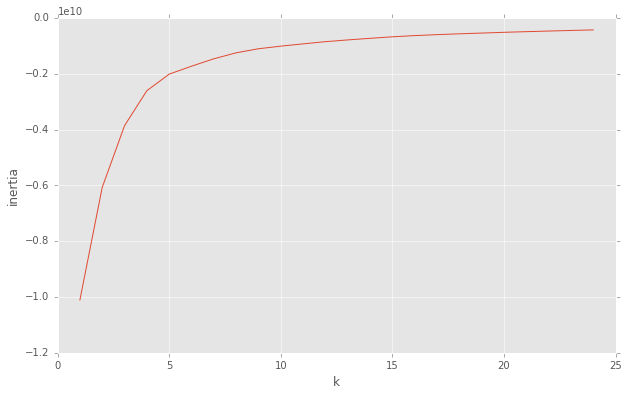

In [26]:
X=nums
y_pred = KMeans(n_clusters=4, n_init=1, init='random', max_iter=3).fit_predict(X)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o")
#for i in range (0,50):
#    plt.annotate(names[i],xy=(X[i,0],X[i,1]),xytext=(X[i,0],X[i,1]))
plt.show()

# Run k-means
scores = []
ks = []


for i in range(1,25):
    model = KMeans(n_clusters=i)
    model.fit_predict(X)
    scores.append(model.score(X))
    ks.append(i)

plt.plot(ks, scores)
plt.ylabel('inertia')
plt.xlabel('k')
plt.show()


The inertia plot shows that k=5 is probably optimal, since increases after that point are minimal.

In determining asteroid families more specifically, rather than groups of asteroids, using the entire dataset is rather meaningless. Instead, we look specifically at asteroids with spectral data, sorting them into carbonaceous, silicaceous and metallic asteroids. Asteroids must have the same primary spectral type to be of the same asteroid family. 

In [19]:
btype=fin[fin['spec_B']=='B']
carbon=fin[fin['primary']=='C']
silica=fin[fin['primary']=='S']
metallic=fin[fin['primary']=='X']
spec=carbon.append(silica,ignore_index=True)
spec=spec.append(metallic,ignore_index=True)
cmat=carbon.as_matrix()
cnums=cmat[:,1:7]
smat=silica.as_matrix()
snums=smat[:,1:7]
mmat=metallic.as_matrix()
mnums=mmat[:,1:7]


# Analysis of V-type asteroids

V-type asteroids are particularly interesting because they make up approximately 6% of main belt asteroids. They are noted for having the spectral type of 4 Vesta and often contain high percentages of olivine. It is widely speculated that this group of asteroids is composed of a few collisional families, and we seek to identify them here.

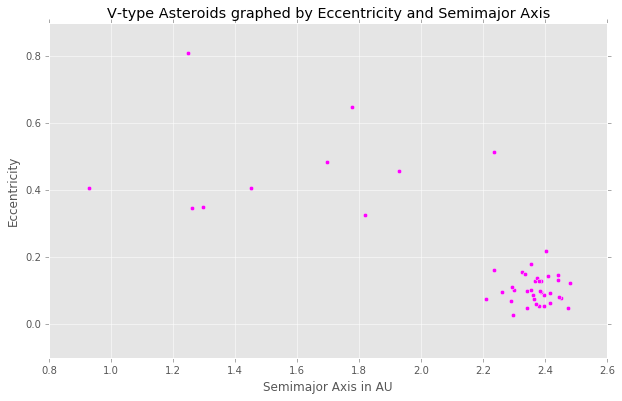

In [20]:
vtype=fin[fin['spec_B']=='V']
ax = vtype.plot(kind="scatter",y="e",x="a",color='Magenta');
vmat=vtype.as_matrix()
vnums=vmat[:,1:7]
plt.xlabel("Semimajor Axis in AU")
plt.ylabel("Eccentricity")
plt.title("V-type Asteroids graphed by Eccentricity and Semimajor Axis")

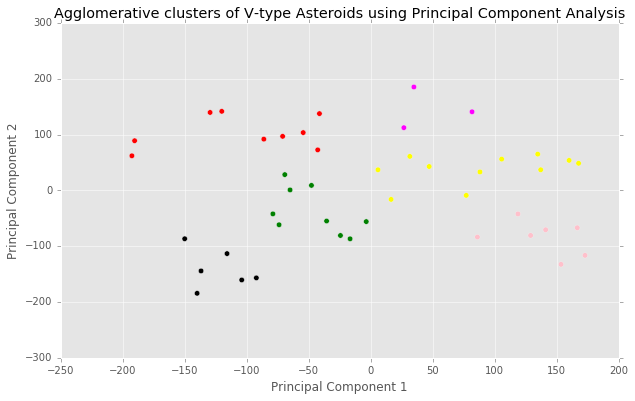

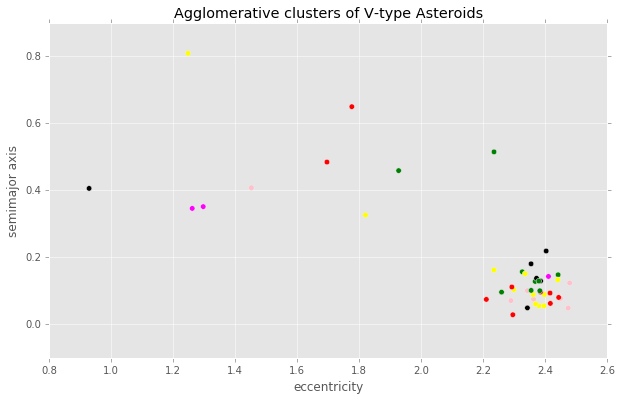

In [36]:
vnums1=vnums#[:,0:2]
agg_cluster_model = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=6)
db = DBSCAN(eps=.01, min_samples=10).fit(vnums1)
ydbv_pred = agg_cluster_model.fit_predict(vnums1)

pca_model = PCA()
X_PCA = pca_model.fit_transform(vnums1)
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=ydbv_pred, cmap=cmap,s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative clusters of V-type Asteroids using Principal Component Analysis')
plt.show()
plt.scatter(vnums1[:, 1], vnums1[:, 0], c=ydbv_pred, cmap=cmap,s=30)
plt.xlabel('eccentricity')
plt.ylabel('semimajor axis')
plt.title('Agglomerative clusters of V-type Asteroids')
plt.show()


Agglomerative clustering divided the V-type asteroids into six clusters. However, asteroid families cannot be conclusively identified since these clusters do not seem fairly dense or well-populated. 

# Analysis of B-type asteroids

First, we look at a relatively rare type of asteroid called a B-type asteroid. The b-type is a subgroup of the more common carbonaceous asteroids, with differences lying in albedo and in ultraviolet measurements.

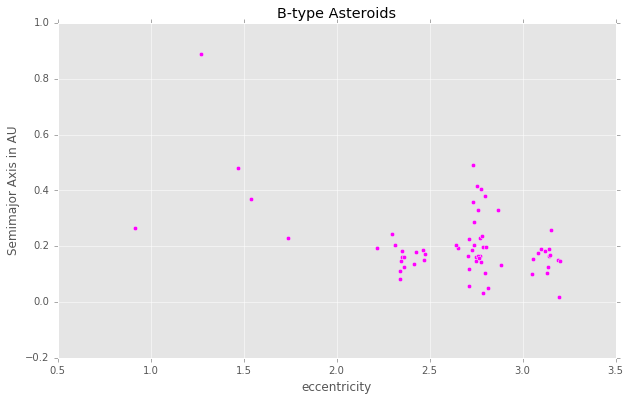

In [37]:
ax = btype.plot(kind="scatter",y="e",x="a",color='Magenta');
plt.xlabel('eccentricity')
plt.ylabel('Semimajor Axis in AU')
plt.title("B-type Asteroids")
bmat=btype.as_matrix()
bnums=bmat[:,1:7]

Immediately, it is noticeable that there are three clusters of fairly high density around semi major axis of 2.4, 2.7 and 3.2 astronomical units respectively. In additon, there appeat to be seeveral outliers with abornmally low semimajor axis for carbonaceous asteroids. 

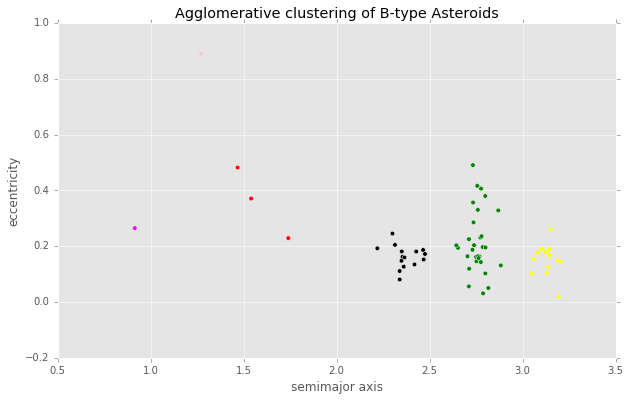

Below are the collisional families that are likely from the Agglomerative clustering of B-Type Asteroids
['  2629 Rudra (1980 RB1)', ' 25330 (1999 KV4)', '  7753 (1988 XB)']
['  1021 Flammario (1924 RG)', '  1474 Beira (1935 QY)', '  1484 Postrema (1938 HC)', '     2 Pallas', '   213 Lilaea', '  1655 Comas Sola (1929 WG)', '  1724 Vladimir (1932 DC)', '  2382 Nonie (1977 GA)', '  2816 Pien (1982 SO)', '  3579 Rockholt (1977 YA)', '  3581 Alvarez (1985 HC)', '  3647 Dermott (1986 AD1)', '  4124 Herriot (1986 SE)', '    47 Aglaja', '    59 Elpis', '    85 Io', '    88 Thisbe', '   531 Zerlina (1904 NW)', '   541 Deborah (1904 OO)', '   560 Delila (1905 QF)', '  4997 Ksana (1986 TM)', '  5079 Brubeck (1975 DB)', '  5102 Benfranklin (1986 RD1)', '  5133 Phillipadams (1990 PA)', '  5222 Ioffe (1980 TL13)', '  5234 Sechenov (1989 VP)', '  5330 Senrikyu (1990 BQ1)', '  5344 Ryabov (1978 RN)', '  5690 (1992 EU)', '  6500 Kodaira (1993 ET)']
['  1331 Solvejg (1933 QS)', '    24 Themis', '   241

In [42]:
agg_cluster_model = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=6)
yagb_pred = agg_cluster_model.fit_predict(bnums1)

plt.scatter(bnums1[:, 1], bnums1[:, 0], c=yagb_pred,  marker="o", cmap=cmap)
plt.ylabel('eccentricity')
plt.xlabel('semimajor axis')
plt.title("Agglomerative clustering of B-type Asteroids")
plt.show()

c0,c1,c2,c3,c4,c5=[],[],[],[],[],[]
cclus=[c0,c1,c2,c3,c4,c5]

for i in range (0,len(yagb_pred)):
    ind=yagb_pred[i]
    name=bmat[i,0]
    cclus[ind].append(name)
print("Below are the collisional families that are likely from the Agglomerative clustering of B-Type Asteroids")
print(cclus[0])
print(cclus[1])
print(cclus[2])
print(cclus[4])
print("\n")
print("Below are the outliers identified by Agglomerative clustering of B-Type Asteroids")
print(cclus[3])

print(cclus[5])
    

The agglomerative clustering has both correctly identified the asteroids in green, ranging from semimajor axis of 2.7 to 2.9, as a cluster. In astronomy literature, this group of asteroids is known as the Pallas family. However, the clusters in blue and pink have not been noted in traditional literature. We can clearly see that both of these clusters are fairly homogeneous and separated distinctly from the other clusters. In addition, all the asteroids being a fairly unusual B-type indicates stronly that these two clusters are likely collisional families themselves. It is interesting to note that we have two asteroids that belong to their own clusters, 3200 Phaethon and 1989 UQ. 

# A type asteroids

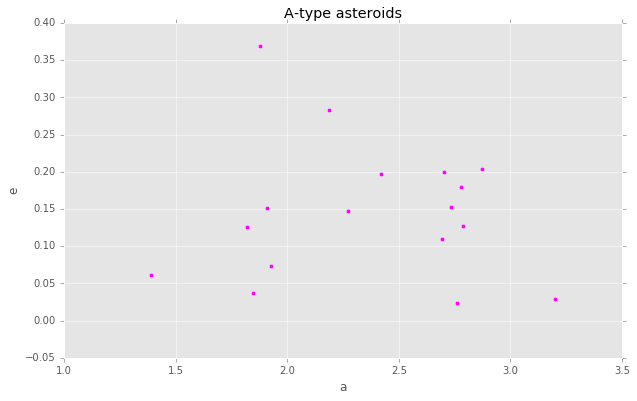

In [43]:
atype=fin[fin['spec_B']=='A']
ax = atype.plot(kind="scatter",y="e",x="a",color='Magenta');
plt.title("A-type asteroids")
amat=atype.as_matrix()
anums=amat[:,1:7]

Looking at the A-type asteroids, we notice that they are all within a very small range of eccentricity, just 0.4. However, they span a wide range of semimajor axis distance, so it is unlikely that any clusters are results of collisional families. 

# Trans-Neptunian Objects

We turn away from analysis of asteroids grouped by their spectra for a moment to examine Trans-Neptunian Objects. Trans-Neptunian Objects are of particular interest to modern astrophysics for several reasons. First, they are a fairly new class of asteroids, and their numbers are increasing. Second, their orbits provide insight into a hypothetical planet nine. Several extreme Trans-Neptunian Objects display orbital alignments to such a degree that it is believed a ninth planet may be required to produce such aligned orbits. 

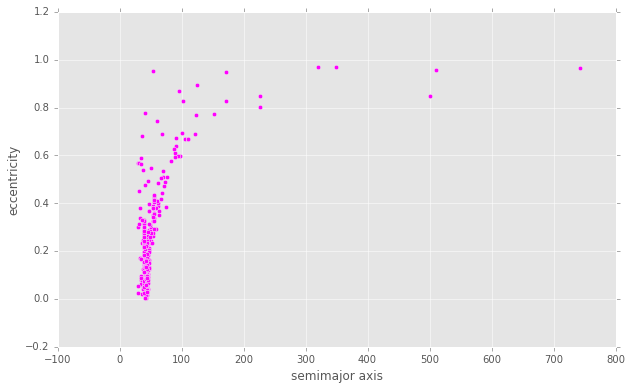

In [33]:
tno=fin[fin['a']>30]
ax = tno.plot(kind="scatter",y="e",x="a",color='Magenta');
plt.xlabel('semimajor axis')
plt.ylabel('eccentricity')
tnomat=tno.as_matrix()
tnonums=tnomat[:,1:7]

We see that the region of highest density lies around semimajor axis of 30 AU, from about 0.0 to 0.4 eccentricity. We remove our extreme TNO's from this dataframe. 

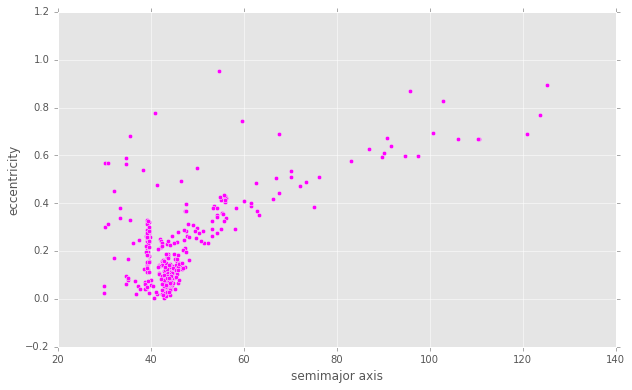

In [45]:
tno=fin[fin['a']>30]
tno=tno[tno['a']<150]
ax = tno.plot(kind="scatter",y="e",x="a",color='Magenta');
plt.xlabel('semimajor axis')
plt.ylabel('eccentricity')
tnomat=tno.as_matrix()
tnonums=tnomat[:,1:7]

We notice a fairly dense cluster now around 42 AU semimajor axis, so we attempt to cluster these asteroids. Once again, we use agglomerative clustering. In this particular clustering, it is of use to consider inclination, eccentricity and semimajor axis. We have already limited semimajor axis by selecting on Trans-Neptunian Objects. In addition, grouping TNO's while considering inclination is important because there exist objects with extreme inclination.

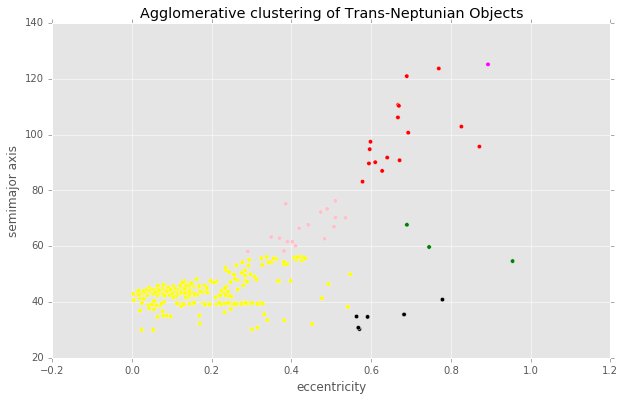

In [48]:
tnonums1=tnonums[:,0:3]
#tnonums1=tnonums
ydbtno_pred = agg_cluster_model.fit_predict(tnonums1)

plt.scatter(tnonums1[:, 0], tnonums1[:, 1], c=ydbtno_pred,  marker="o", cmap=cmap)
plt.xlabel('eccentricity')
plt.ylabel('semimajor axis')
plt.title("Agglomerative clustering of Trans-Neptunian Objects")
plt.show()

#print(ydbtno_pred)


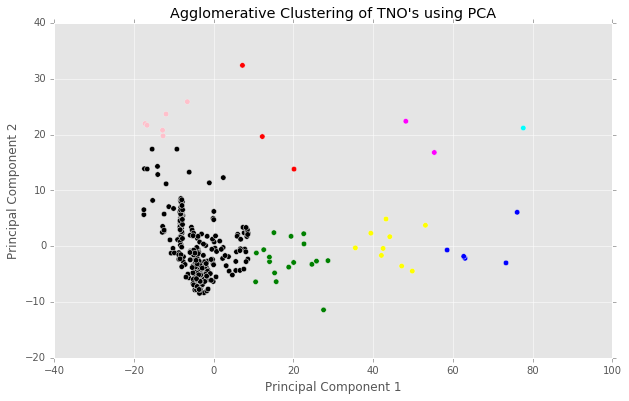

In [51]:
agg_cluster_model = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=8)
yagtno_pred = agg_cluster_model.fit_predict(tnonums1)


    
pca_model = PCA()
X_PCA = pca_model.fit_transform(tnonums1)
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=yagtno_pred, cmap=cmap,s=30)
#plt.scatter(tnonums1[:, 1], tnonums1[:, 0], c=ydbtno_pred, cmap=cmap,s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Agglomerative Clustering of TNO's using PCA")
plt.show()
#print(yagtno_pred)


We notice that clusters are visible even on a eccentricity vs. semimajor axis graph. These categorizations give us asteroid groups, rather than asteroid families, since spectral data has not been considered. Since spectral data is very rarely directly obtained due to the distance of these asteroids, it is difficult to identify specific asteroid families among the TNO's. However, this gives the interesting result of three fairly dense groupings of Trans-Neptunian Objects.

# Carbonaceous asteroids

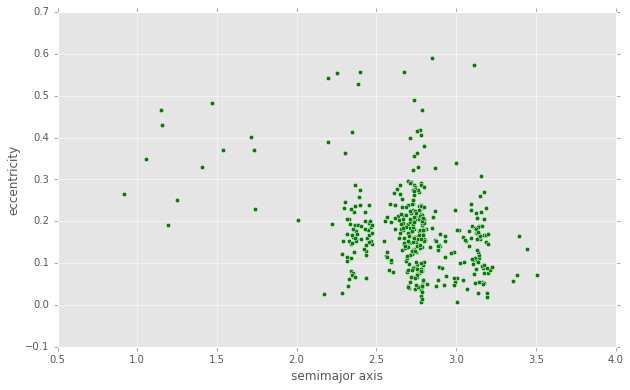

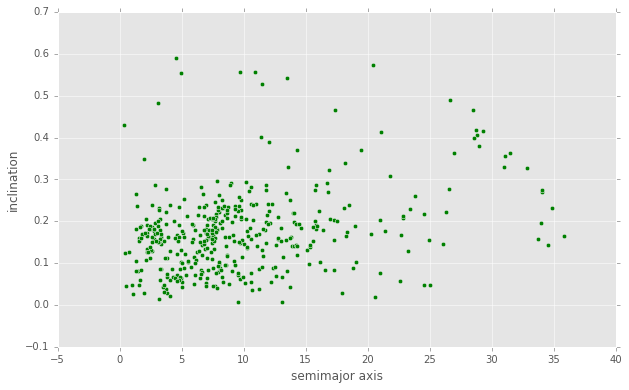

In [69]:
ax = carbon.plot(kind="scatter",y="e",x="a",color='Green');
plt.xlabel('semimajor axis')
plt.ylabel('eccentricity')
ax = carbon.plot(kind="scatter",y="e",x="i",color='Green');
plt.xlabel('semimajor axis')
plt.ylabel('inclination')

By plotting the carbonaceous asteroids by their asteroid elements, we begin to suspect that there are three fairly dense clusters of asteroids in semimajor axis and eccentricity.

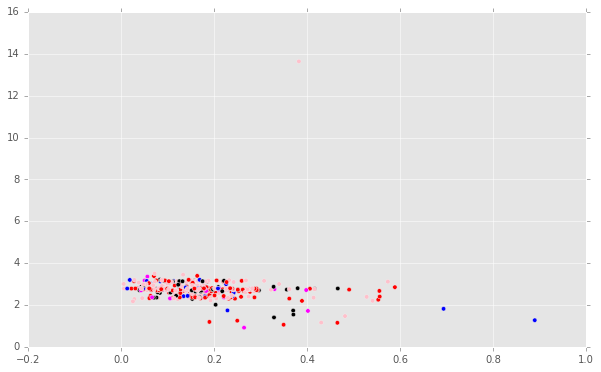

In [61]:
agg_cluster_model = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=5)
y_pred = agg_cluster_model.fit_predict(cnums)

plt.scatter(cnums[:, 0], cnums[:, 1], c=y_pred,  marker="o", cmap=cmap)
plt.show()


We notice immediately that there are three outliers, 2060 Chiron (1977 UB), 3200 Phaethon (1983 TB), and 37006 (2000 YO29). We can exclude these because it is unlikely they will belong to other asteroid families. Graphing the agglomerative clustering again, we see that there are no more obvious outliers. Then, we can graph clusters using PCA.

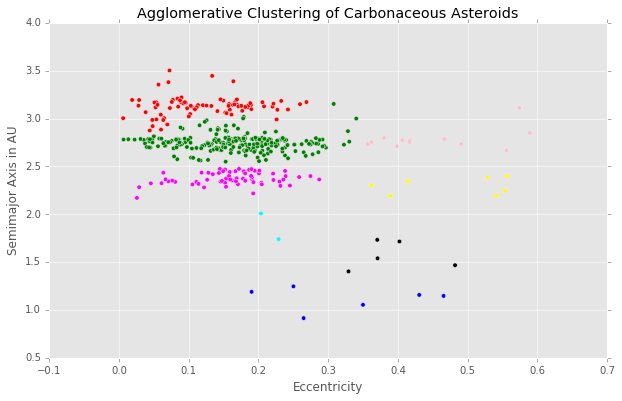

In [66]:
carbon=fin[fin['primary']=='C']
carbon=carbon[carbon['e']<.6]
carbon=carbon[carbon['a']<4]
cmat=carbon.as_matrix()
cnums=cmat[:,1:4]

agg_cluster_model = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=8)
y_pred = agg_cluster_model.fit_predict(cnums)

plt.scatter(cnums[:, 0], cnums[:, 1], c=y_pred,  marker="o", cmap=cmap)
plt.xlabel("Eccentricity")
plt.ylabel("Semimajor Axis in AU")
plt.title("Agglomerative Clustering of Carbonaceous Asteroids")
plt.show()

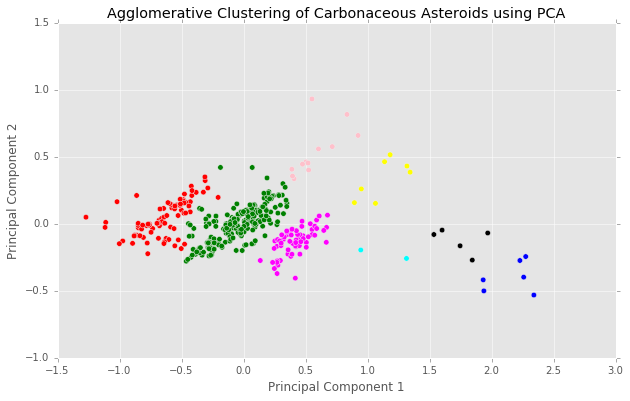

In [67]:
pca_model = PCA()
X_PCA = pca_model.fit_transform(cnums)

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y_pred, cmap=cmap,s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title("Agglomerative Clustering of Carbonaceous Asteroids using PCA")
plt.show()

C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\A

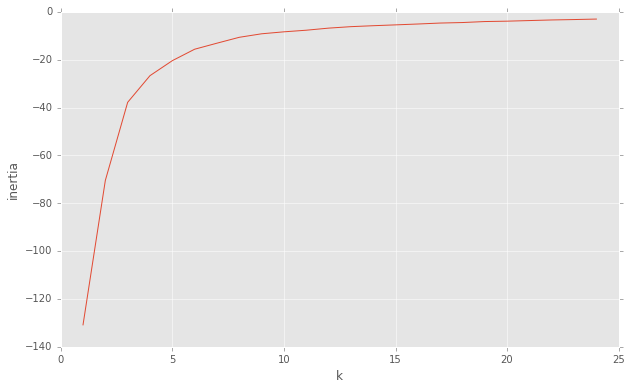

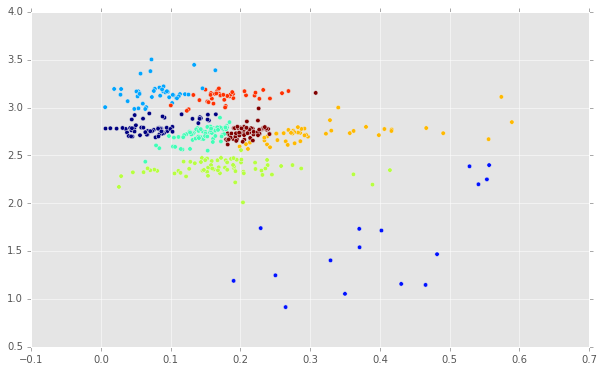

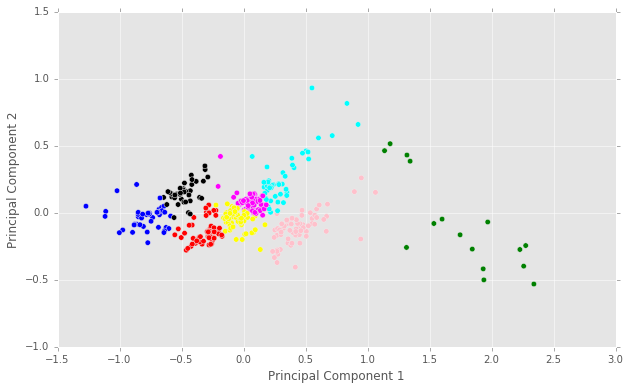

IndexError: list index out of range

In [79]:
scores = []
ks = []

for i in range(1,25):
    model = KMeans(n_clusters=i)
    model.fit_predict(cnums)
    scores.append(model.score(cnums))
    ks.append(i)

plt.plot(ks, scores)
plt.ylabel('inertia')
plt.xlabel('k')
plt.show()

yc_pred = KMeans(n_clusters=8, n_init=1, init='random', max_iter=3).fit_predict(cnums)
plt.clf()
plt.scatter(cnums[:, 0], cnums[:, 1], c=yc_pred,  marker="o")
#for i in range (0,50):
#    plt.annotate(names[i],xy=(X[i,0],X[i,1]),xytext=(X[i,0],X[i,1]))
plt.show()

pca_model = PCA()
X_PCA = pca_model.fit_transform(cnums)

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=yc_pred, cmap=cmap,s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
c0,c1,c2,c3,c4=[],[],[],[],[]
cclus=[c0,c1,c2,c3,c4]

for i in range (0,len(yc_pred)):
    ind=yc_pred[i]
    name=cmat[i,0]
    cclus[ind].append(name)
print(cclus[0])
    

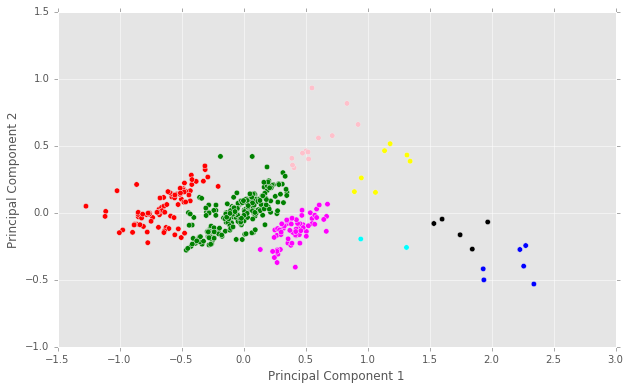

[1 0 1 1 0 7 0 1 1 7 0 0 1 1 0 1 1 7 1 1 1 0 1 1 1 1 0 1 7 0 1 1 1 0 1 0 1
 1 1 1 0 1 1 7 1 1 1 4 1 6 2 1 7 0 0 1 0 1 1 7 0 0 0 0 0 1 1 1 1 1 0 1 1 1
 7 1 0 1 1 1 0 1 0 1 1 7 7 0 4 1 0 1 0 1 0 1 1 1 1 1 7 1 1 1 1 1 7 1 1 0 1
 7 1 1 1 7 0 3 1 0 0 1 1 1 1 1 1 7 7 7 7 1 1 1 0 1 7 1 1 7 7 1 5 0 0 7 1 7
 7 7 1 7 1 1 1 0 7 1 0 7 7 7 4 6 3 2 2 2 0 1 0 1 1 1 1 0 7 1 7 1 1 1 0 0 1
 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 7 1 1 1 7 0 1 7 0 7 1 7 1 7 1 7 0 1 0 1 7
 4 4 1 1 7 1 1 1 1 3 7 1 1 1 1 1 1 1 3 1 1 1 1 7 1 1 1 1 1 1 7 5 7 1 7 7 1
 7 7 2 3 3 4 6 1 0 0 1 7 0 1 1 1 0 1 1 1 1 1 7 1 1 0 1 1 0 0 1 1 1 1 0 0 0
 1 0 0 1 1 1 1 1 0 1 7 0 1 1 7 0 0 1 1 7 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 7 0
 1 1 1 1 1 1 0 7 7 1 0 0 1 0 1 7 1 1 1 1 1 1 7 7 1 1 1 4 1 1 7 1 1 1 1 1 1
 1 1 7 1 1 4 7 1 1 1 4 1 1 4 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 4 6 1
 1 1 1 2 3 6]


In [80]:
db = DBSCAN(eps=0.03, min_samples=10).fit(cnums)
ydbc_pred = agg_cluster_model.fit_predict(cnums)

#plt.scatter(cnums[:, 0], cnums[:, 1], c=ydbc_pred,  marker="o", cmap=cmap)
pca_model = PCA()
X_PCA = pca_model.fit_transform(cnums)

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=ydbc_pred, cmap=cmap,s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print(ydbc_pred)




Here, we have clustered the same set of Carbonaceous asteroids using , agglomerative and K-Means clustering. The k-means clustering was quite different in comparison to agglomerative clustering. It is likely that results from agglomerative clustering are more accurate in determination of asteroid families, due to the clear separations visible between clusters. Agglomerative clustering produces visible groups of outliers that are unlikely to be families. In particular, the groups in red, gree and magenta are likely to be asteroid families. This is an important result, indicating that many carbonaceous asteroids can be classed into one of three families. 

# Metallic Asteroids

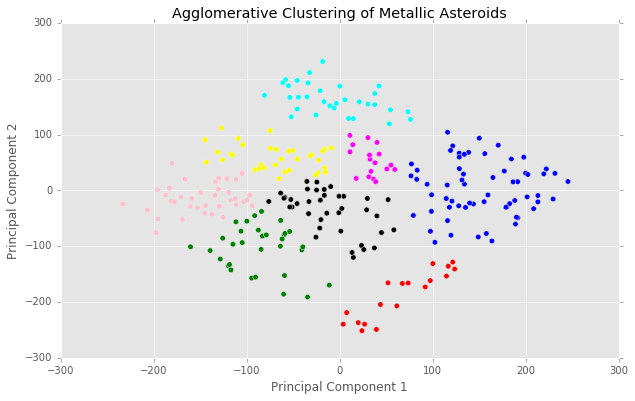

In [71]:

ydbm_pred = agg_cluster_model.fit_predict(mnums)

#plt.scatter(mnums[:, 0], mnums[:, 1], c=ydbm_pred,  marker="o", cmap=cmap)
pca_model = PCA()
X_PCA = pca_model.fit_transform(mnums)

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=ydbm_pred, cmap=cmap,s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Agglomerative Clustering of Metallic Asteroids")
plt.show()


The clustering of Metallic Asteroids did not yield significant results. It is unlikely that any clusters are collisional families or important classes. 

# Silicaceous Asteroids

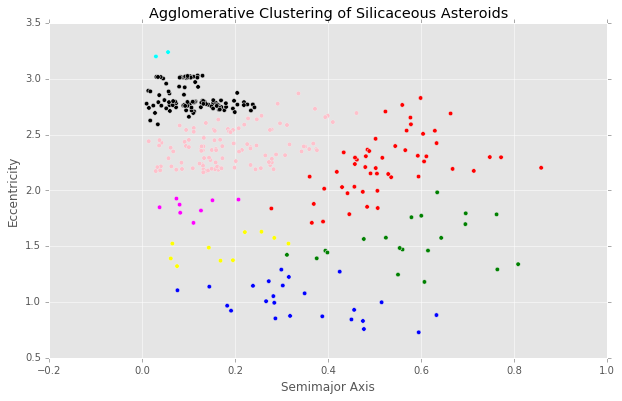

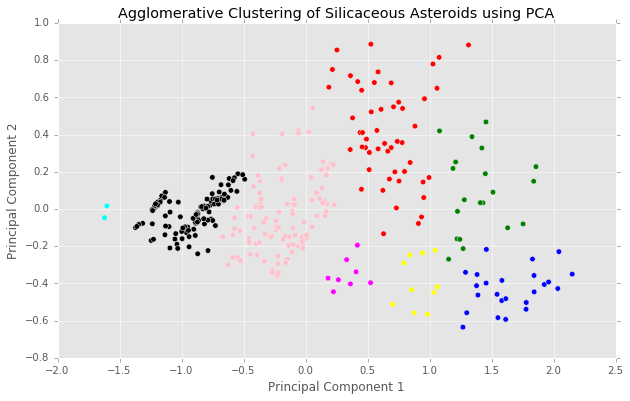

In [73]:
#snums1=snums
snums1=snums[:,0:3]
db = DBSCAN(eps=.03, min_samples=10).fit(snums1)
ydbs_pred = agg_cluster_model.fit_predict(snums1)

plt.scatter(snums1[:, 0], snums1[:, 1], c=ydbs_pred,  marker="o", cmap=cmap)
plt.xlabel('Semimajor Axis')
plt.ylabel('Eccentricity')
plt.title("Agglomerative Clustering of Silicaceous Asteroids")
plt.show()
pca_model = PCA()
X_PCA = pca_model.fit_transform(snums1)

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=ydbs_pred, cmap=cmap,s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title("Agglomerative Clustering of Silicaceous Asteroids using PCA")
plt.show()

    

Here, it is fairly likely that the black and pink clusters represent collisional families. They are fairly dense, with a clear separation from the other silicaceous asteroids.